In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sb
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

In [46]:
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [2]:
df = pd.read_csv('data/travel_data.csv')

In [3]:
column_mapping = {
    'SEQ_NO': '순번',
    'ALL_KWRD_RANK_CO': '검색어_순위',
    'SRCHWRD_NM': '검색어',
    'UPPER_CTGRY_NM': '상위_카테고리',
    'LWPRT_CTGRY_NM': '하위_카테고리',
    'CNTT_NM': '대륙',
    'COUNTRY_NM': '국가',
    'MOBILE_SCCNT_VALUE': '모바일_검색수',
    'PC_SCCNT_VALUE': 'PC_검색수',
    'SCCNT_SM_VALUE': '총_검색수',
    'SCCNT_DE': '날짜'
}

In [4]:
df.rename(columns=column_mapping, inplace=True)

In [5]:
df

,순번,검색어_순위,검색어,상위_카테고리,하위_카테고리,대륙,국가,모바일_검색수,PC_검색수,총_검색수,날짜
0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,20190701
1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,20190701
2,15746,3,후쿠오카여행,여행,해외여행,아시아,일본,5103,499,5602,20190701
3,15747,4,블라디보스톡여행,여행,해외여행,아시아,러시아,4406,743,5149,20190701
4,15748,5,오사카여행,여행,해외여행,아시아,일본,3761,1288,5049,20190701
...,...,...,...,...,...,...,...,...,...,...,...
23853,24471,6,싱가포르여행,여행,해외여행,아시아,싱가포르,3018,801,3819,20250211
23854,24472,7,오사카여행,여행,해외여행,아시아,일본,2673,982,3655,20250211
23855,24473,8,도쿄여행,여행,해외여행,아시아,일본,2210,908,3118,20250211
23856,24474,9,발리여행,여행,해외여행,아시아,인도네시아,2077,626,2703,20250211


In [6]:
df.to_csv('data/travel_ko_data.csv')

In [7]:
df

,순번,검색어_순위,검색어,상위_카테고리,하위_카테고리,대륙,국가,모바일_검색수,PC_검색수,총_검색수,날짜
0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,20190701
1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,20190701
2,15746,3,후쿠오카여행,여행,해외여행,아시아,일본,5103,499,5602,20190701
3,15747,4,블라디보스톡여행,여행,해외여행,아시아,러시아,4406,743,5149,20190701
4,15748,5,오사카여행,여행,해외여행,아시아,일본,3761,1288,5049,20190701
...,...,...,...,...,...,...,...,...,...,...,...
23853,24471,6,싱가포르여행,여행,해외여행,아시아,싱가포르,3018,801,3819,20250211
23854,24472,7,오사카여행,여행,해외여행,아시아,일본,2673,982,3655,20250211
23855,24473,8,도쿄여행,여행,해외여행,아시아,일본,2210,908,3118,20250211
23856,24474,9,발리여행,여행,해외여행,아시아,인도네시아,2077,626,2703,20250211


In [8]:
pd.read_csv('data/travel_ko_data.csv')

,Unnamed: 0,순번,검색어_순위,검색어,상위_카테고리,하위_카테고리,대륙,국가,모바일_검색수,PC_검색수,총_검색수,날짜
0,0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,20190701
1,1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,20190701
2,2,15746,3,후쿠오카여행,여행,해외여행,아시아,일본,5103,499,5602,20190701
3,3,15747,4,블라디보스톡여행,여행,해외여행,아시아,러시아,4406,743,5149,20190701
4,4,15748,5,오사카여행,여행,해외여행,아시아,일본,3761,1288,5049,20190701
...,...,...,...,...,...,...,...,...,...,...,...,...
23853,23853,24471,6,싱가포르여행,여행,해외여행,아시아,싱가포르,3018,801,3819,20250211
23854,23854,24472,7,오사카여행,여행,해외여행,아시아,일본,2673,982,3655,20250211
23855,23855,24473,8,도쿄여행,여행,해외여행,아시아,일본,2210,908,3118,20250211
23856,23856,24474,9,발리여행,여행,해외여행,아시아,인도네시아,2077,626,2703,20250211


In [10]:
df.loc[df['총_검색수']==0,]

,순번,검색어_순위,검색어,상위_카테고리,하위_카테고리,대륙,국가,모바일_검색수,PC_검색수,총_검색수,날짜
23518,24136,1,괌여행,여행,해외여행,오세아니아,미국,0,0,0,20250109
23519,24137,2,칸여행,여행,해외여행,유럽,프랑스,0,0,0,20250109
23520,24138,3,계림여행,여행,해외여행,아시아,중국,0,0,0,20250109
23521,24139,4,고아여행,여행,해외여행,아시아,인도,0,0,0,20250109
23522,24140,5,곤명여행,여행,해외여행,아시아,중국,0,0,0,20250109
23523,24141,6,교토여행,여행,해외여행,아시아,일본,0,0,0,20250109
23524,24142,7,규슈여행,여행,해외여행,아시아,일본,0,0,0,20250109
23525,24143,8,냐짱여행,여행,해외여행,아시아,베트남,0,0,0,20250109
23526,24144,9,네팔여행,여행,해외여행,아시아,네팔,0,0,0,20250109
23527,24145,10,뉴욕여행,여행,해외여행,북아메리카,미국,0,0,0,20250109


In [13]:
df['국가'].nunique()

49

In [14]:
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')

In [22]:
df['총_검색수'] = pd.to_numeric(df['총_검색수'], errors='coerce')

In [24]:
df = df.dropna()

In [25]:
asia_df = df[df['대륙'] == '아시아']

In [26]:
monthly_data = asia_df.groupby([asia_df['날짜'].dt.to_period('M'), '국가'])['총_검색수'].sum().reset_index()

In [27]:
monthly_data['날짜'] = monthly_data['날짜'].dt.to_timestamp()

In [29]:
monthly_data

,날짜,국가,총_검색수
0,2019-07-01,대만,223094
1,2019-07-01,라오스,3911
2,2019-07-01,러시아,162850
3,2019-07-01,몽골,66430
4,2019-07-01,베트남,164784
...,...,...,...
588,2025-02-01,싱가포르,43458
589,2025-02-01,인도네시아,31679
590,2025-02-01,일본,224782
591,2025-02-01,중국,52809


In [28]:
print(f"전체 데이터 수: {len(monthly_data)}")

전체 데이터 수: 593


In [38]:
countries = monthly_data['국가'].unique()
predictions = {}

for country in countries:
    country_data = monthly_data[monthly_data['국가'] == country]
    if len(country_data) < 2:
        print(f"{country}의 데이터가 부족합니다. 건너뜁니다.")
        continue
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(country_data.rename(columns={'날짜': 'ds', '총_검색수': 'y'}))
    
    future = model.make_future_dataframe(periods=1, freq='M')
    forecast = model.predict(future)
    
    predictions[country] = forecast['yhat'].iloc[-1]

22:11:01 - cmdstanpy - INFO - Chain [1] start processing
22:11:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\WIN\anaconda3\envs\hi2\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
22:11:02 - cmdstanpy - INFO - Chain [1] start processing
22:11:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\WIN\anaconda3\envs\hi2\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
22:11:02 - cmdstanpy - INFO - Chain [1] start processing
22:11:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\WIN\anaconda3\envs\hi2\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
22:11:03 - cmdstanpy - INFO - Chain [1] start processin

카타르의 데이터가 부족합니다. 건너뜁니다.
네팔의 데이터가 부족합니다. 건너뜁니다.


c:\Users\WIN\anaconda3\envs\hi2\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [39]:
predictions

{'대만': 3941.3973316921038,
 '라오스': 62043.37732538006,
 '러시아': -30401.49300963257,
 '몽골': 443688.6883898922,
 '베트남': 33712.15596082399,
 '싱가포르': -35978.834956340084,
 '인도네시아': 89949.83950504418,
 '일본': 400823.88733172405,
 '중국': 6181.5448404201015,
 '태국': 8257.02873039848,
 '필리핀': 191500.07155666873,
 '아랍에미리트': -92383.3677393052,
 '이스라엘': 20183.21762899359,
 '인도': 31245.59046603617,
 '말레이시아': 12069.011232647059,
 '캄보디아': 50845.36075670194,
 '요르단': -30908.69174628542}

In [40]:
sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

In [41]:
print("다음 달 예상 인기 아시아 여행지 순위:")
for i, (country, value) in enumerate(sorted_predictions[:5], 1):
    print(f"{i}. {country}: {value:.0f}")

다음 달 예상 인기 아시아 여행지 순위:
1. 몽골: 443689
2. 일본: 400824
3. 필리핀: 191500
4. 인도네시아: 89950
5. 라오스: 62043


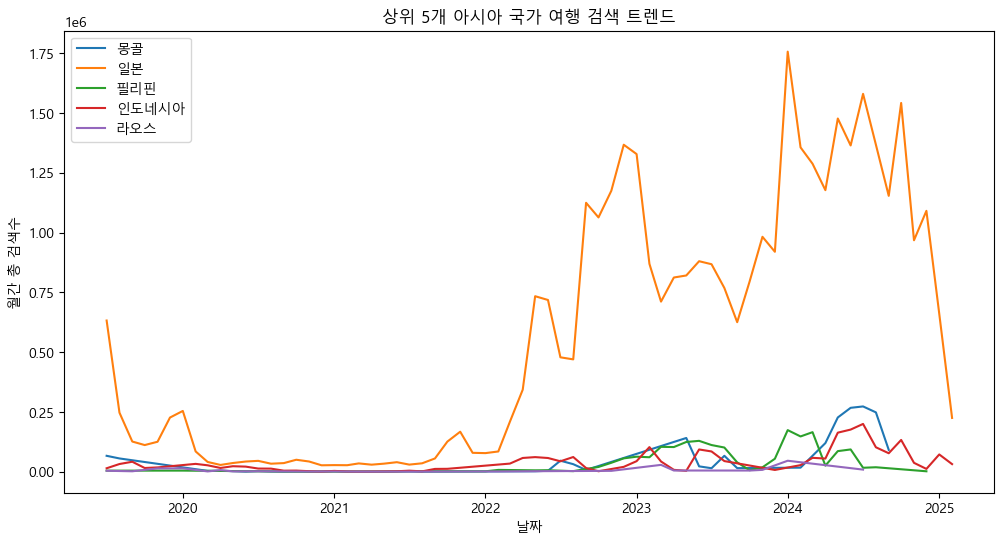

In [47]:
plt.figure(figsize=(12, 6))
for country in [x[0] for x in sorted_predictions[:5]]:
    country_data = monthly_data[monthly_data['국가'] == country]
    plt.plot(country_data['날짜'], country_data['총_검색수'], label=country)

plt.legend()
plt.title("상위 5개 아시아 국가 여행 검색 트렌드")
plt.xlabel("날짜")
plt.ylabel("월간 총 검색수")
plt.show()